In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import (
    recall_score, 
    precision_score, 
    f1_score, 
    silhouette_score,
    davies_bouldin_score
)

In [3]:
# Clase contains which type of tissue is each
X = pd.read_csv('datasets/dataset_tissue.txt', index_col = 0).T
y = pd.read_csv('datasets/clase.txt', index_col = 0)

In [4]:
X_sc = MinMaxScaler().fit_transform(X)

Normalizing data

In [5]:
# declaring and pca instance
pca = PCA(n_components = 60, random_state = 23)

# fitting pipeline
X_pca = pca.fit_transform(X_sc)

In [6]:
X_pca

array([[ -5.42329124, -12.2683582 ,   9.00111828, ...,   1.14077385,
          0.17201587,   2.48216327],
       [ -8.73275835, -12.59538796,   6.3317751 , ...,  -0.03229582,
         -0.91982159,  -0.86133693],
       [ -9.24502852,  -0.97764565,   8.71379403, ...,  -0.60658221,
         -0.67590603,  -0.4824903 ],
       ...,
       [-13.10002872,  -6.4571055 ,   2.56779968, ...,  -0.4417286 ,
         -0.29748162,  -0.41769577],
       [-14.68833824,   0.01919342,   1.31596615, ...,   0.2277238 ,
          0.19048803,   0.12284142],
       [-16.67453082,   0.2506692 ,   1.01034996, ...,   1.46861863,
         -0.97375503,   1.09870759]])

Now we apply DBScan to get clusters found. Since we don't know how many clusters we have (in theory) we apply some techniques called Silhouette Score and Davies-Bouldin to assess the quality of the clusters. A higher silhouette score or lower Davies-Bouldin index indicates better-defined clusters.

In [8]:
list_eps = np.linspace(15, 20, 500)
list_min_samples = [2]
list_silhouette_avg = []
for eps in list_eps:
    for min_samples in list_min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=int(min_samples))
        dbscan_labels = dbscan.fit_predict(X_pca)
        if len(set(dbscan_labels)) > 1:
            silhouette_avg = silhouette_score(X_pca, dbscan_labels, random_state=23)
            list_silhouette_avg.append((silhouette_avg,eps,min_samples))
            # print(f"Silhouette Score: {silhouette_avg}")
            # print("EPS:", eps)
            # print("min_samples:", min_samples)
            # print(np.unique(dbscan_labels))

print(max(list_silhouette_avg, key = lambda x: x[0]))

(0.354613029095344, 17.024048096192384, 2)


In [22]:
dbscan = DBSCAN(eps=19.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, dbscan_labels, random_state=23)
davies_bouldin_avg = davies_bouldin_score(X_pca, dbscan_labels)

print(silhouette_avg)
print(davies_bouldin_avg)
print(dbscan_labels)
print(np.unique(dbscan_labels))

0.30768958873033714
1.7023839104043343
[ 0  1  0  1  1  0 -1  0  1  0  1  0  1  0  1  0  2  2 -1  2 -1  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  0  4  4  0  4  4  4  4  0  4  4  4  4  5  5  5 -1  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  7  7  7  6  6  6  7 -1 -1  6 -1 -1 -1  7  8  8  8 -1  8 -1 -1
 -1 -1 -1 -1  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  8  8 -1  8  8
 -1  8  8  8  8  8  8 10 10 10 10 10  3 -1  3 -1 -1 -1 -1 -1 -1]
[-1  0  1  2  3  4  5  6  7  8  9 10]


In [20]:
dbscan = DBSCAN(eps=17.22, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, dbscan_labels, random_state=23)
davies_bouldin_avg = davies_bouldin_score(X_pca, dbscan_labels)

print(silhouette_avg)
print(davies_bouldin_avg)
print(dbscan_labels)
print(np.unique(dbscan_labels))

0.35661316581887015
1.3960240980296266
[ 0 -1  0  1  1  0 -1  0  1  0 -1  0 -1  0  1  0  2  2 -1  2 -1  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  0 -1  4  0  4  4  4  4  0  4  4  4  4  5  5  5 -1  5  5  5  5  5  5
  5 -1  5  5  5  5  5  5  5  5  5  5  5 -1  5  5  5  5  5  5  5  5  5  5
  6  6  6  7  7  7  6  6  6  8 -1  8  6 -1 -1 -1 -1  9  9  9 -1 10 11 11
 12 12 13 13 14 14 14 14 14 14 -1 14 14 14 14 14 14 14 14 15 16 17 10 15
 17 10 16 10 10 10 10 -1 18 18 18 18  3 -1  3 19 19 -1 -1 -1 -1]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [25]:
dbscan = DBSCAN(eps=14.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, dbscan_labels, random_state=23)
davies_bouldin_avg = davies_bouldin_score(X_pca, dbscan_labels)

print(silhouette_avg)
print(davies_bouldin_avg)
print(dbscan_labels)
print(np.unique(dbscan_labels))

0.12355715953656954
1.522043092899324
[-1 -1  0 -1 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0  1  1 -1  1 -1 -1  1  1
  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2 -1 -1  3 -1  3  3  3 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  4  4 -1 -1 -1 -1  4  4  4 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  5 -1  5  5  5 -1 -1  5  6  6  6  6  6  6  6 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  2 -1 -1 -1 -1 -1 -1]
[-1  0  1  2  3  4  5  6]


In [11]:
from sklearn.metrics import silhouette_score

if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(X_pca, dbscan_labels, random_state=23)
    print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.12355715953656954


In order to visualize how clusters were corresponded, another pca fit is done but this time only with 2 components to have x-y axis

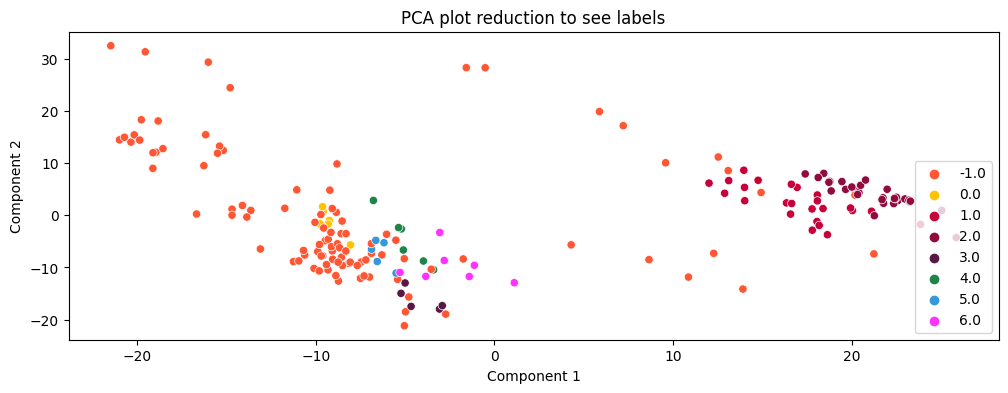

In [28]:
# declaring pca instance to use to plot
pca_plot = PCA(n_components = 2, random_state = 23)
n_components= len(np.unique(dbscan_labels))

# Creating the X_plot data set
X_plot = pca_plot.fit_transform(X_sc)
X_plot_dbscan= np.c_[X_plot, dbscan_labels]

# ploting with sns
colors = ["#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845", "#1E8449", "#3498DB",
            "#FF33FF", "#33FFCC", "#FF6666", "#99CC99", "#3399FF", "#FF9933", "#CC33FF", "#66CCCC"]

plt.figure(figsize = (12, 4))          
sns.scatterplot(x = X_plot_dbscan[:, 0], y = X_plot_dbscan[:, 1], hue = X_plot_dbscan[:, 2], palette = colors[:n_components])
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('PCA plot reduction to see labels')
plt.legend(loc = 'lower right')
plt.show()

Then it is compared to the actual "y" targets, as first step, a encoding transformation has to be performed before the comparison

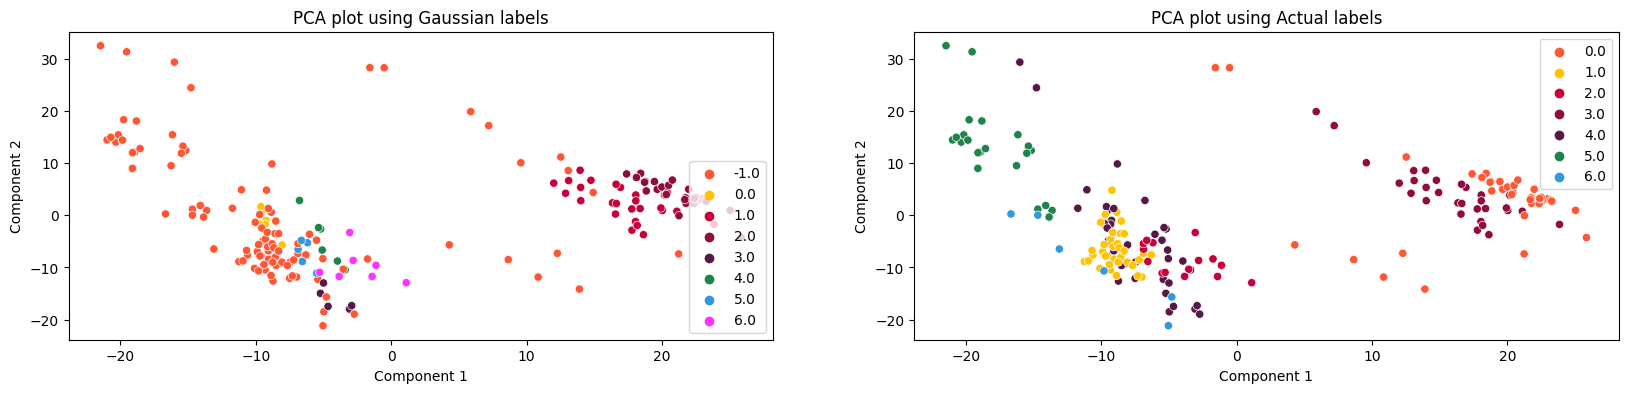

In [29]:
# changing unique values for numeric ones
y_label = np.zeros((len(y),1))
target_dict = dict()
for label, tissue_type in enumerate(np.unique(y)):
    y_label = np.where(y == tissue_type, label, y_label)
    target_dict[label] = tissue_type

y_label = y_label.ravel().astype(int)

# plotting one next to the other
X_plot_dbscan = np.c_[X_plot, dbscan_labels]
X_plot_real = np.c_[X_plot, y_label]

fig, axis = plt.subplots(1, 2, figsize = (20, 4))
colors = ["#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845", "#1E8449", "#3498DB",
            "#FF33FF", "#33FFCC", "#FF6666", "#99CC99", "#3399FF", "#FF9933", "#CC33FF", "#66CCCC"]

## first plot
sns.scatterplot(x = X_plot_dbscan[:, 0], y = X_plot_dbscan[:, 1], hue = X_plot_dbscan[:, 2], palette = colors[:n_components], ax = axis[0])
axis[0].set_ylabel('Component 2')
axis[0].set_xlabel('Component 1')
axis[0].set_title('PCA plot using Gaussian labels')
axis[0].legend(loc = 'lower right')

## second plot
sns.scatterplot(x = X_plot_real[:, 0], y = X_plot_real[:, 1], hue = X_plot_real[:, 2], palette = colors[:7], ax = axis[1])
axis[1].set_ylabel('Component 2')
axis[1].set_xlabel('Component 1')
axis[1].set_title('PCA plot using Actual labels')
plt.show()

By looking at the plots, we don't get good values

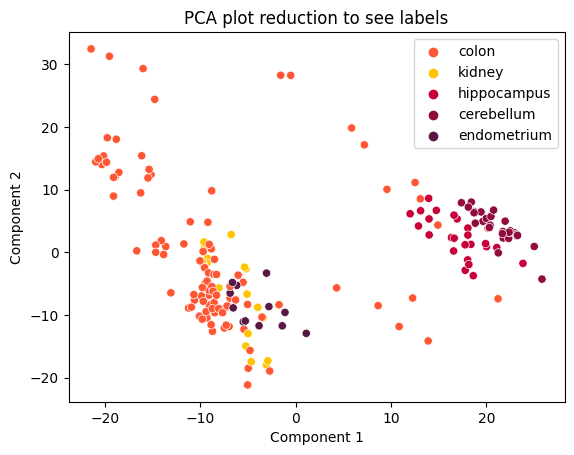

In [30]:
# Creating a dataframe with dbscan clusters and actual labels
base_information = {'dbscan_labels': dbscan_labels,
                    'actual_labels': y_label,
                    'label_name': y.to_numpy().ravel()}

data_clusters = pd.DataFrame(base_information)

# querying dataframe to verify most frequent label name per dbscan label
dbscan_dict = data_clusters.groupby('dbscan_labels').agg({'label_name': lambda x: x.mode().iloc[0]}).to_dict()['label_name']
data_clusters['predicted_label_name'] = data_clusters['dbscan_labels'].map(dbscan_dict) # predictions
n_unique_predicted = len(np.unique(data_clusters['predicted_label_name']))

# ploting with sns
colors = ["#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845", "#1E8449", "#3498DB",
            "#FF33FF", "#33FFCC", "#FF6666", "#99CC99", "#3399FF", "#FF9933", "#CC33FF", "#66CCCC"]
            
sns.scatterplot(x = X_plot_dbscan[:, 0], y = X_plot_dbscan[:, 1], hue = data_clusters['predicted_label_name'], palette = colors[:n_unique_predicted])
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('PCA plot reduction to see labels')
plt.legend(loc = 'upper right')
plt.show()

Now it is time to evaluate recall, precision and f1 score using macro average.

In [31]:
# getting actual values and predictions
y_actual = data_clusters.label_name
y_pred = data_clusters.predicted_label_name

# getting scores
recall_gauss = recall_score(y_actual, y_pred, average = 'macro', zero_division = 0)
precision_gauss = precision_score(y_actual, y_pred, average = 'macro', zero_division = 0)
f1_gauss = f1_score(y_actual, y_pred, average = 'macro', zero_division = 0)

# Showing metrics
print(f"Recall score: {recall_gauss:.4f}")
print(f"Precision score: {precision_gauss:.4f}")
print(f"F1 score: {f1_gauss:.4f}")

Recall score: 0.5473
Precision score: 0.6177
F1 score: 0.5383
